In [2]:
import nltk
nltk.download('names')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


True

In [4]:
#Q1Find names in the name corpus that are ambiguous for male and female gender?
names = nltk.corpus.names
names.fileids()
male_names = names.words('male.txt')
female_names = names.words('female.txt')
[w for w in male_names if w in female_names]

['Abbey',
 'Abbie',
 'Abby',
 'Addie',
 'Adrian',
 'Adrien',
 'Ajay',
 'Alex',
 'Alexis',
 'Alfie',
 'Ali',
 'Alix',
 'Allie',
 'Allyn',
 'Andie',
 'Andrea',
 'Andy',
 'Angel',
 'Angie',
 'Ariel',
 'Ashley',
 'Aubrey',
 'Augustine',
 'Austin',
 'Averil',
 'Barrie',
 'Barry',
 'Beau',
 'Bennie',
 'Benny',
 'Bernie',
 'Bert',
 'Bertie',
 'Bill',
 'Billie',
 'Billy',
 'Blair',
 'Blake',
 'Bo',
 'Bobbie',
 'Bobby',
 'Brandy',
 'Brett',
 'Britt',
 'Brook',
 'Brooke',
 'Brooks',
 'Bryn',
 'Cal',
 'Cam',
 'Cammy',
 'Carey',
 'Carlie',
 'Carlin',
 'Carmine',
 'Carroll',
 'Cary',
 'Caryl',
 'Casey',
 'Cass',
 'Cat',
 'Cecil',
 'Chad',
 'Chris',
 'Chrissy',
 'Christian',
 'Christie',
 'Christy',
 'Clair',
 'Claire',
 'Clare',
 'Claude',
 'Clem',
 'Clemmie',
 'Cody',
 'Connie',
 'Constantine',
 'Corey',
 'Corrie',
 'Cory',
 'Courtney',
 'Cris',
 'Daffy',
 'Dale',
 'Dallas',
 'Dana',
 'Dani',
 'Daniel',
 'Dannie',
 'Danny',
 'Darby',
 'Darcy',
 'Darryl',
 'Daryl',
 'Deane',
 'Del',
 'Dell',
 'Deme

In [14]:
#Q2: Investigate the holonym-meronym relations for some nouns. Remember that there are three
#kinds of holonym-meronym relation, so you need to use member_meronyms() , part_meronyms() ,
#substance_meronyms() , member_holonyms() , part_holonyms() , and substance_holonyms() .

from nltk.corpus import wordnet
nltk.download('omw-1.4')
# nltk.download('wordnet')
# wn=wordnet
house = wordnet.synsets('house')
print(house)
house = wordnet.synset('house.n.01')
print(house.lemma_names())
print(house.definition())
print(house.examples())
print(house.member_meronyms())
print(house.part_meronyms())
print(house.substance_meronyms())
print(house.member_holonyms())
print(house.part_holonyms())
print(house.substance_holonyms())

food = wordnet.synsets('food')
print(food)
food = wordnet.synset('food.n.01')
print(food.lemma_names())
print(food.definition())
print(food.examples())
print(food.member_meronyms())
print(food.part_meronyms())
print(food.substance_meronyms())
print(food.member_holonyms())
print(food.part_holonyms())
print(food.substance_holonyms())

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


[Synset('house.n.01'), Synset('firm.n.01'), Synset('house.n.03'), Synset('house.n.04'), Synset('house.n.05'), Synset('house.n.06'), Synset('house.n.07'), Synset('sign_of_the_zodiac.n.01'), Synset('house.n.09'), Synset('family.n.01'), Synset('theater.n.01'), Synset('house.n.12'), Synset('house.v.01'), Synset('house.v.02')]
['house']
a dwelling that serves as living quarters for one or more families
['he has a house on Cape Cod', 'she felt she had to get out of the house']
[]
[Synset('library.n.01'), Synset('loft.n.02'), Synset('porch.n.01'), Synset('study.n.05')]
[]
[]
[]
[]
[Synset('food.n.01'), Synset('food.n.02'), Synset('food.n.03')]
['food', 'nutrient']
any substance that can be metabolized by an animal to give energy and build tissue
[]
[]
[Synset('food.n.02')]
[]
[]
[]
[]


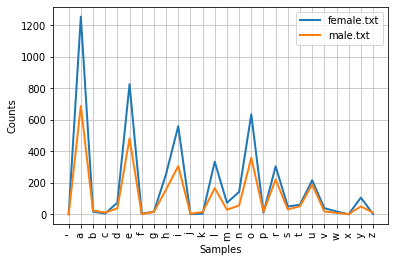

In [15]:
#Q3: Define a conditional frequency distribution over the Names Corpus that allows you to see
#which initial letters are more frequent for males versus females?
cfd = nltk.ConditionalFreqDist((fileid,name[1]) for fileid in names.fileids() for name in names.words(fileid))
cfd.plot()

In [16]:
#Q4: Define a function supergloss(s) that takes a synset s as its argument and returns a string
#consisting of the concatenation of the definition of s , and the definitions of all the hypernyms?
def supergloss(s):
    definitions=s.definition();
    for hypo in s.hyponyms():
        definitions+="\n"+hypo.definition()
    for hyper in s.hypernyms():
        definitions+="\n"+hyper.definition()
    return definitions

definitions = supergloss(wn.synset('car.n.01'))
print(definitions)

a motor vehicle with four wheels; usually propelled by an internal combustion engine
a vehicle that takes people to and from hospitals
a car that has a long body and rear door with space behind rear seat
a car that is old and unreliable
a car driven by a person whose job is to take passengers where they want to go in exchange for money
a small and economical car
a car that has top that can be folded or removed
a car with two doors and front seats and a luggage compartment
a car in which policemen cruise the streets; equipped with radiotelephonic communications to headquarters
a car that is powered by electricity
a car with relatively low fuel efficiency
a car that resembles a convertible but has a fixed rigid top
a car having a hatchback door
an early term for an automobile
a car modified to increase its speed and acceleration
a car suitable for traveling over rough terrain
large luxurious car; usually driven by a chauffeur
a car that is lent as a replacement for one that is under repa

In [17]:
#Q5: The polysemy of a word is the number of senses it has. Using WordNet, we can determine that
#the noun dog has seven senses with len(wn.synsets('dog', 'n')) . Compute the average polysemy of
#nouns, verbs, adjectives, and adverbs according to WordNet.
all_synsets = wn.all_synsets()
synsets_per_word = [synst for synst in all_synsets]
